In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import pandas as pd

fontlist = fm.findSystemFonts(fontpaths=None, fontext="ttf")
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc("font", family=font_name)

ori = pd.read_csv("./ref/행정구역시도성연령별취업자.csv", encoding="EUC-KR")
ex_data = ori.copy() 

In [2]:
ex_data.columns = ["resion","year","age","gender","value"] #컬럼 이름 변경
ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"] = ex_data.loc[ex_data["resion"] =="세종특별자치시", "value"].replace("-",0) # 세종시의 값 수정(17년도 전 값이 -로 되어있음)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [7]:
data = ex_data.set_index("resion")
busan_data = data.loc["부산광역시"]
busan_data

,year,age,gender,value
resion,,,,
부산광역시,2014.1/4,20 - 29세,남자,96
부산광역시,2014.1/4,20 - 29세,여자,121
부산광역시,2014.1/4,30 - 39세,남자,221
부산광역시,2014.1/4,30 - 39세,여자,129
부산광역시,2014.1/4,40 - 49세,남자,247
...,...,...,...,...
부산광역시,2024.4/4,40 - 49세,여자,152
부산광역시,2024.4/4,50 - 59세,남자,218
부산광역시,2024.4/4,50 - 59세,여자,180


In [24]:
#부산 내 남녀인원 분할
gender_data = busan_data.set_index("gender")
male_data = gender_data.drop("여자",axis=0)
female_data = gender_data.drop("남자",axis=0)

#부산 내 남성인원 토탈
male_data["value"] = male_data["value"].astype(int)
male_data = male_data.groupby('year')["value"].sum().reset_index(name="total") 


#부산 내 여성 인원 토탈
female_data["value"] = female_data["value"].astype(int) 
female_data = female_data.groupby('year')["value"].sum().reset_index(name="total") 

female_data

,year,total
0,2014.1/4,680
1,2014.2/4,716
2,2014.3/4,724
3,2014.4/4,723
4,2015.1/4,700
5,2015.2/4,711
6,2015.3/4,712
7,2015.4/4,736
8,2016.1/4,721
9,2016.2/4,727


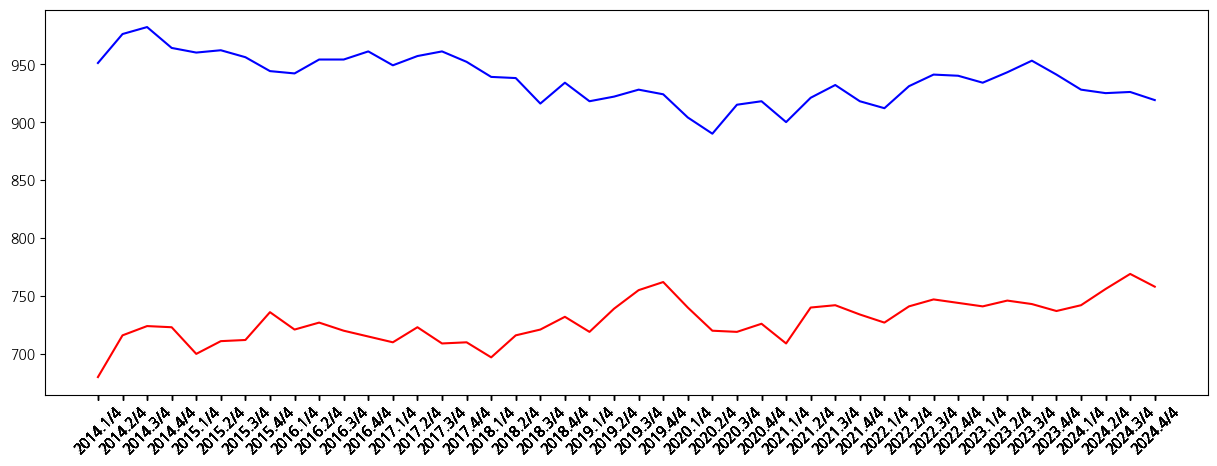

In [25]:
plt.figure(figsize=(15,5))
plt.plot(male_data["year"],male_data["total"], color="blue")
plt.plot(female_data["year"],female_data["total"], color="red")
plt.xticks(range(len(male_data)))
plt.xticks(busan_data["year"],rotation=45)
plt.show()